In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMites/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Pregnancies,Glucose BloodPressure and SkinThickness have min value of 0 ?

<Axes: >

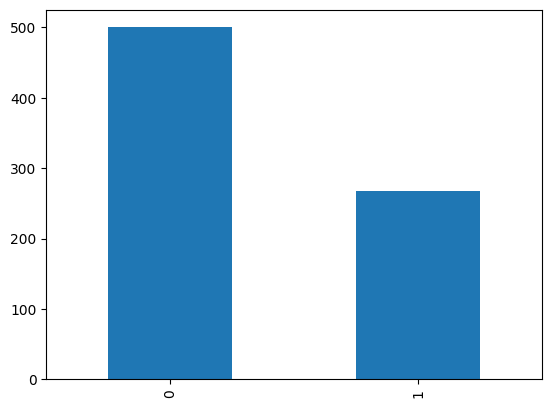

In [ ]:
data['Outcome'].value_counts().plot.bar()

* Data inbalance can be seen.

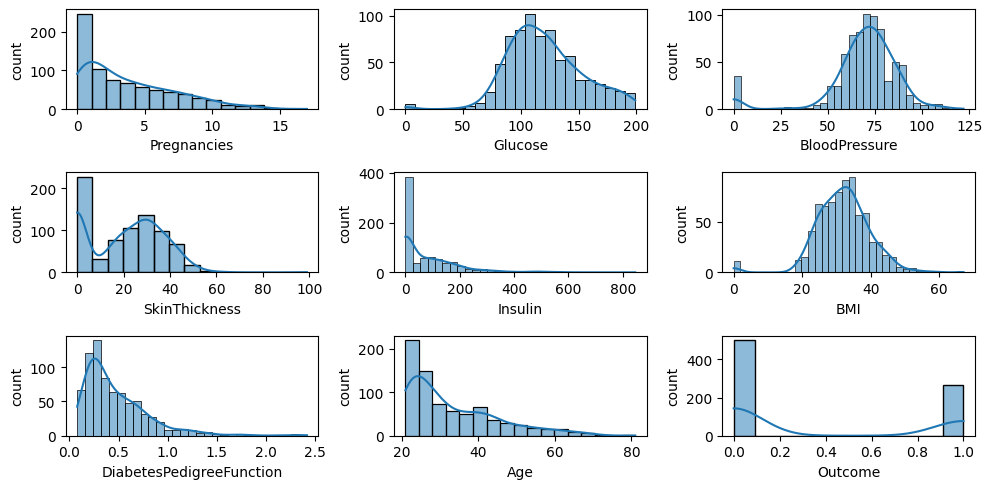

In [ ]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data:
  if plotnumber<=9:
    ax = plt.subplot(3,3,plotnumber)
    sns.histplot(x=data[column],kde=True)
    plt.xlabel(column,fontsize=10)
    plt.ylabel('count',fontsize=10)
  plotnumber +=1
plt.tight_layout()

* Glucose, BloodPressure and BMI having normal distribution.

<Axes: xlabel='Pregnancies', ylabel='count'>

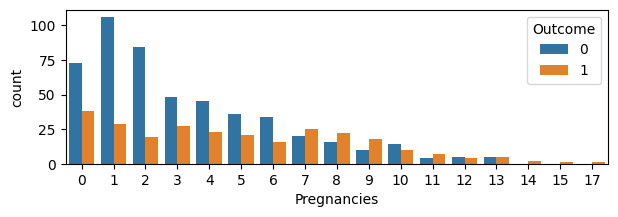

In [ ]:
plt.figure(figsize=(7,2))
sns.countplot(data=data, x = 'Pregnancies',hue = 'Outcome')

* Maximum Patients conceived 0 or 1 times.
* As the pregnancies is high, the probability of being diabetes is also high.
* As the number of pregnancies is less, the probability of being diabetic is less.

<Axes: xlabel='Glucose', ylabel='Count'>

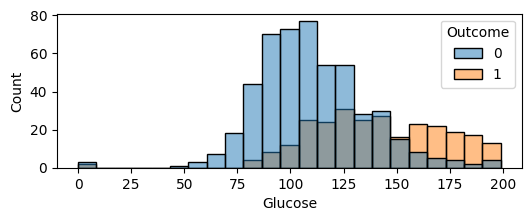

In [ ]:
plt.figure(figsize=(6,2))
sns.histplot(data=data, x='Glucose',hue='Outcome')

* If glucose level is high, the chance of being diabetic is also high.
* If glucose level is less, then chance of being diabetic is less.

<Axes: xlabel='BloodPressure', ylabel='Count'>

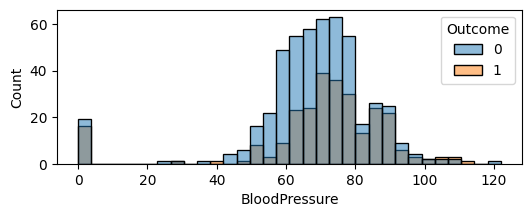

In [ ]:
plt.figure(figsize=(6,2))
sns.histplot(data=data, x='BloodPressure',hue='Outcome')

* The chance of being diabetic is less if bloodpressure low or normal
* The chance of being diabetic is high if bloodpressure high

<Axes: xlabel='Insulin', ylabel='Count'>

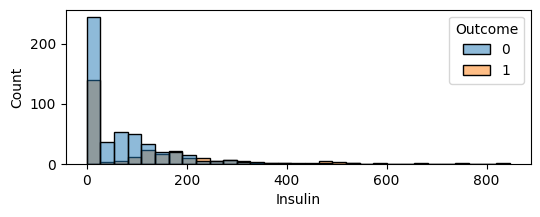

In [ ]:
plt.figure(figsize=(6,2))
sns.histplot(data=data, x='Insulin',hue='Outcome')

* The chance of being diabetic is less if Insulin level is less.
* The chance of being diabetic is high if Insulin level is high.

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

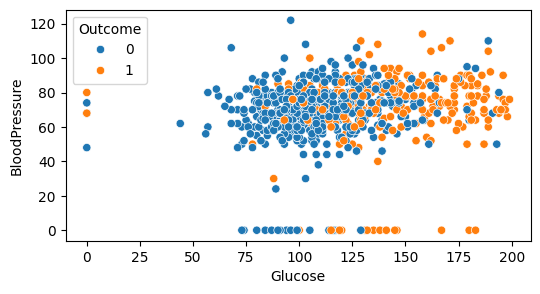

In [ ]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data, x='Glucose',y='BloodPressure', hue='Outcome')

* The patients with less glucose level and bloodpressure will have less chance of being diabetic.
* The patients with high glucose level and bloodpressure will have high chance of being diabetic.

<Axes: xlabel='Insulin', ylabel='BloodPressure'>

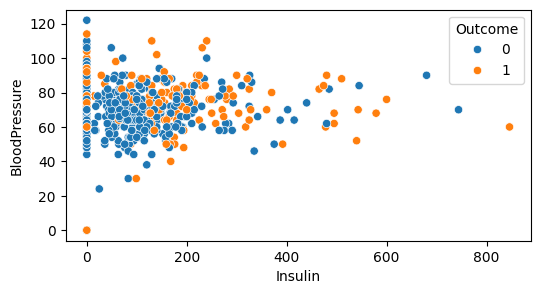

In [ ]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data, x='Insulin',y='BloodPressure', hue='Outcome')

* The chance of being diabetic is less with low BP and low insulin level
* The chance being diabetic is high with high insulin level and normal or low BP.

<Axes: >

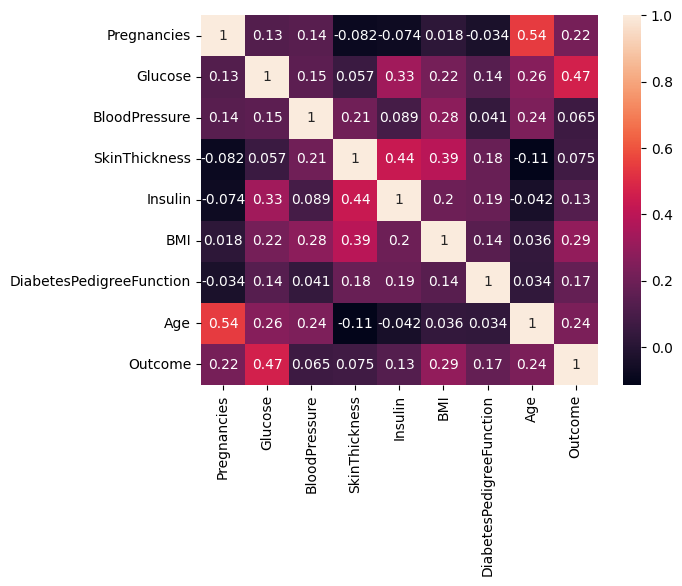

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
#Numerical Missing : mean(when normal distribution) // median(skewed curve)
data.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Insulin'][data['Insulin'] == 0]

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [ ]:
# Handle Corrupted Data
data['Glucose'][data['Glucose'] == 0] = data['Glucose'].median()
#data['Glucose'].replace(0,data['Glucose'].median(), inplace=True)

<ipython-input-575-4da5b19442e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Glucose'][data['Glucose'] == 0] = data['Glucose'].median()


In [ ]:
data['Insulin'][data['Insulin'] == 0] = data['Insulin'].median()

<ipython-input-576-9b62c96505bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Insulin'][data['Insulin'] == 0] = data['Insulin'].median()


In [ ]:
data['BloodPressure'][data['BloodPressure'] == 0] = data['BloodPressure'].median()

<ipython-input-577-ff1d7d643204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BloodPressure'][data['BloodPressure'] == 0] = data['BloodPressure'].median()


In [ ]:
data['BMI'].replace(0,data['BMI'].median(), inplace=True)

In [ ]:
data['SkinThickness'].replace(0,data['SkinThickness'].median(), inplace=True)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


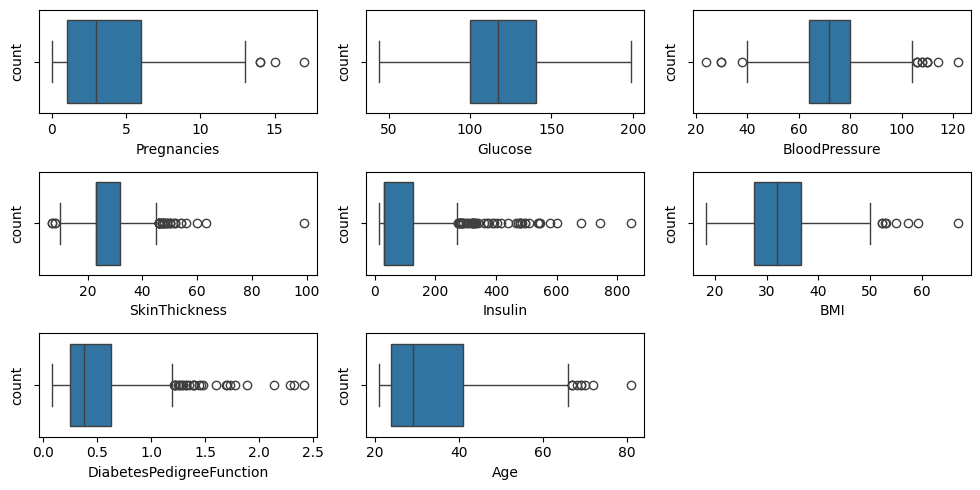

In [ ]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data.drop('Outcome',axis=1):
  if plotnumber<9:
    ax = plt.subplot(3,3,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('count',fontsize=10)
  plotnumber +=1
plt.tight_layout()

* Scaling(Normalization does not remove outliers)

In [ ]:
# import numpy as np

# def replace_outliers_with_median(data):
#     outliers_info = {}  # Dictionary to store information about outliers for each column

#     while True:
#         outliers_found = False  # Flag to track if any outliers were found in this iteration

#         for column in data.columns:
#             # Calculate the first quartile (Q1)
#             Q1 = np.percentile(data[column], 25)

#             # Calculate the third quartile (Q3)
#             Q3 = np.percentile(data[column], 75)

#             # Calculate the interquartile range (IQR)
#             IQR = Q3 - Q1

#             # Calculate the lower bound (Q1 - 1.5 * IQR)
#             lower_bound = Q1 - 1.5 * IQR

#             # Calculate the upper bound (Q3 + 1.5 * IQR)
#             upper_bound = Q3 + 1.5 * IQR

#             # Calculate the percentage of outliers
#             num_outliers = np.sum((data[column] < lower_bound) | (data[column] > upper_bound))
#             percentage_outliers = (num_outliers / len(data[column])) * 100
#             outliers_info[column] = {'IQR': IQR, 'percentage_outliers': percentage_outliers}

#             # If the percentage of outliers is less than 5%, replace outliers with median
#             if percentage_outliers < 5:
#                 median = np.median(data[column])
#                 data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median
#                 outliers_found = True  # Set flag to indicate outliers were found

#         # If no outliers were found in this iteration, break the loop
#         if not outliers_found:
#             break

#         # Check if all columns have either 0% or more than 5% outliers
#         all_columns_ok = all(info['percentage_outliers'] == 0 or info['percentage_outliers'] > 5 for info in outliers_info.values())

#       # If all columns meet the condition, break the loop
#         if all_columns_ok:
#             break

#     return outliers_info


## Scaling is important to transform continuous data into certain scale

### Normalization or Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
df=['Pregnancies','Outcome']
data1 = scaling.fit_transform(data.drop(df,axis=1))

In [ ]:
data1

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data2=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
data2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [ ]:
data2.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.501008,0.493742,0.221029,0.096938,0.291430,0.168179,0.204015
std,0.196376,0.123435,0.100315,0.126860,0.140601,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359677,0.408163,0.173913,0.019832,0.190184,0.070773,0.050000
50%,0.470968,0.489796,0.173913,0.020733,0.282209,0.125747,0.133333
75%,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1 = data[['Pregnancies','Outcome']]

In [ ]:
new_data=pd.concat([data2,df1],axis=1)

In [ ]:
new_data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


<Axes: xlabel='BloodPressure', ylabel='Count'>

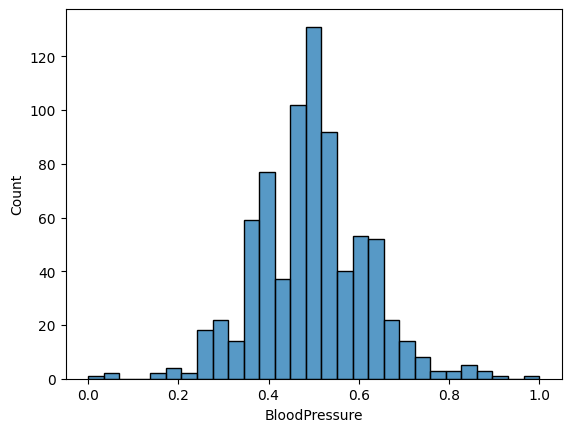

In [ ]:
sns.histplot(data=new_data['BloodPressure'])

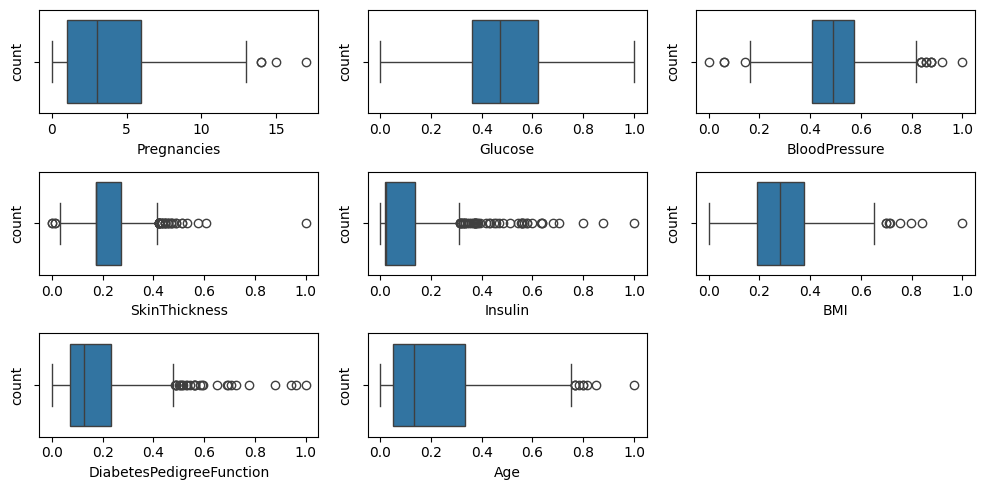

In [ ]:
plt.figure(figsize=(10,5),facecolor='white')
plotnumber=1
for column in data.drop('Outcome',axis=1):
  if plotnumber<9:
    ax = plt.subplot(3,3,plotnumber)
    sns.boxplot(x=new_data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('count',fontsize=10)
  plotnumber +=1
plt.tight_layout()

In [ ]:
new_data.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
Glucose,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.128213,0.492782
BloodPressure,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.208615,0.165723
SkinThickness,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.032568,0.189065
Insulin,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,-0.055697,0.148457
BMI,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.021546,0.312249
DiabetesPedigreeFunction,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,-0.033523,0.173844
Age,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,1.000000,0.221898
Outcome,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,0.221898,1.000000


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def transform_and_plot(data):
    # Calculate the first quartile (Q1)
    Q1 = np.percentile(data, 25)

    # Calculate the third quartile (Q3)
    Q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower bound (Q1 - 1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR

    # Calculate the upper bound (Q3 + 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR

    # Eliminate outliers using the IQR method
    data_without_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

    # Plot the boxplot and histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(x=data_without_outliers, ax=axes[0])
    axes[0].set_title('Boxplot')
    axes[0].set_xlabel('Transformed Values')

    # Histogram
    sns.histplot(data_without_outliers, ax=axes[1], kde=True)
    axes[1].set_title('Histogram')
    axes[1].set_xlabel('Transformed Values')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'data' is your dataset
# Replace 'data' with your actual dataset name

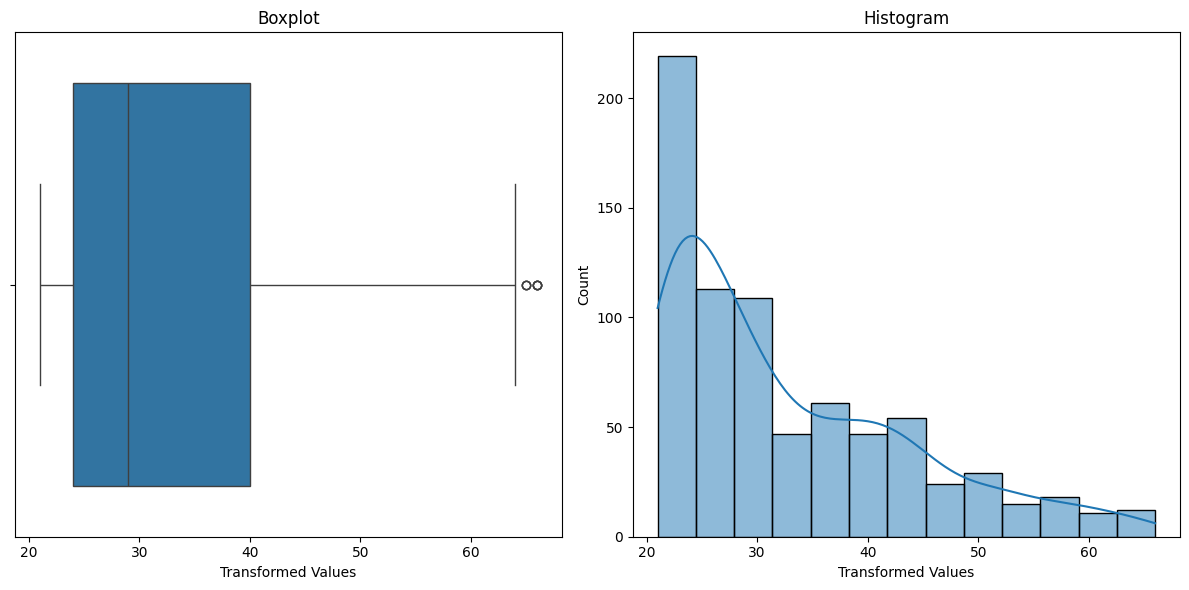

In [ ]:
transform_and_plot(data['Age'])

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def transform_and_plot(data):
    # Calculate the mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)

    # Define the lower and upper bounds for outliers
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev

    # Eliminate outliers using the 3-sigma method
    data_without_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

    # Plot the boxplot and histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(x=data_without_outliers, ax=axes[0])
    axes[0].set_title('Boxplot')
    axes[0].set_xlabel('Transformed Values')

    # Histogram
    sns.histplot(data_without_outliers, ax=axes[1], kde=True)
    axes[1].set_title('Histogram')
    axes[1].set_xlabel('Transformed Values')

    plt.tight_layout()
    plt.show()

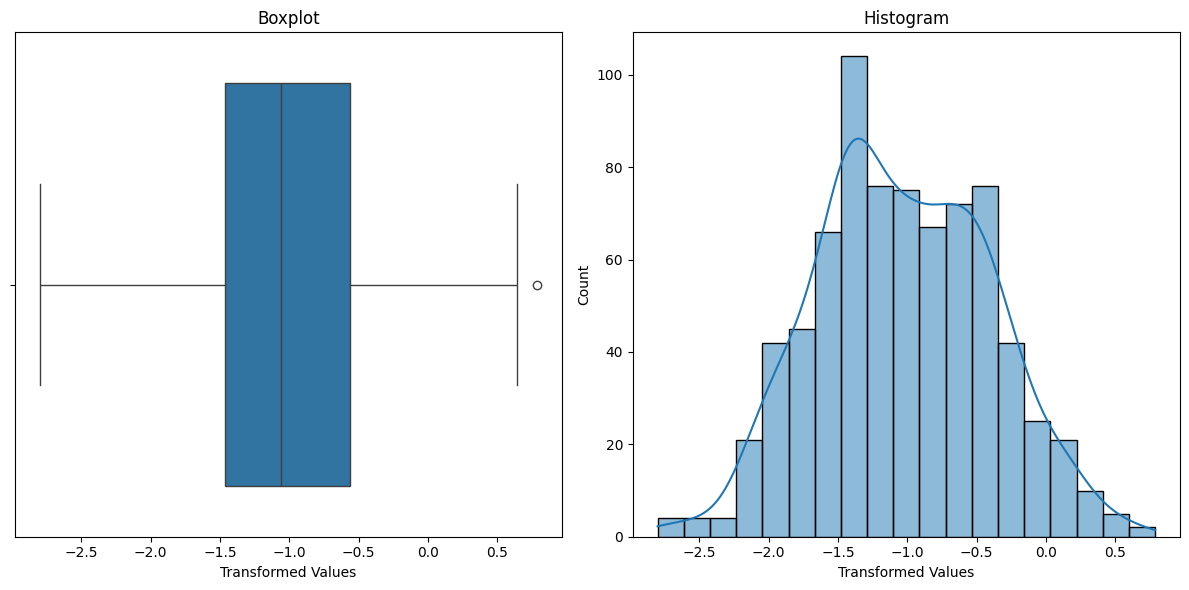

In [ ]:
transform_and_plot(transformed_data['0'])

In [ ]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt

def boxcox_transform_and_plot(data):
    # Add a small constant to handle zero and negative values
    data_positive = data - np.min(data) + 0.001

    # Apply Box-Cox transformation
    transformed_data, _ = boxcox(data_positive)

    # Plot histograms and box plots of original and transformed data
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Original data histogram
    axes[0, 0].hist(data, bins=20, color='blue', alpha=0.7)
    axes[0, 0].set_title('Original Data Histogram')
    axes[0, 0].set_xlabel('Values')
    axes[0, 0].set_ylabel('Frequency')

    # Transformed data histogram
    axes[0, 1].hist(transformed_data, bins=20, color='green', alpha=0.7)
    axes[0, 1].set_title('Transformed Data Histogram')
    axes[0, 1].set_xlabel('Transformed Values')
    axes[0, 1].set_ylabel('Frequency')

    # Original data box plot
    axes[1, 0].boxplot(data)
    axes[1, 0].set_title('Original Data Box Plot')
    axes[1, 0].set_ylabel('Values')

    # Transformed data box plot
    axes[1, 1].boxplot(transformed_data)
    axes[1, 1].set_title('Transformed Data Box Plot')
    axes[1, 1].set_ylabel('Transformed Values')

    plt.tight_layout()
    plt.show()


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

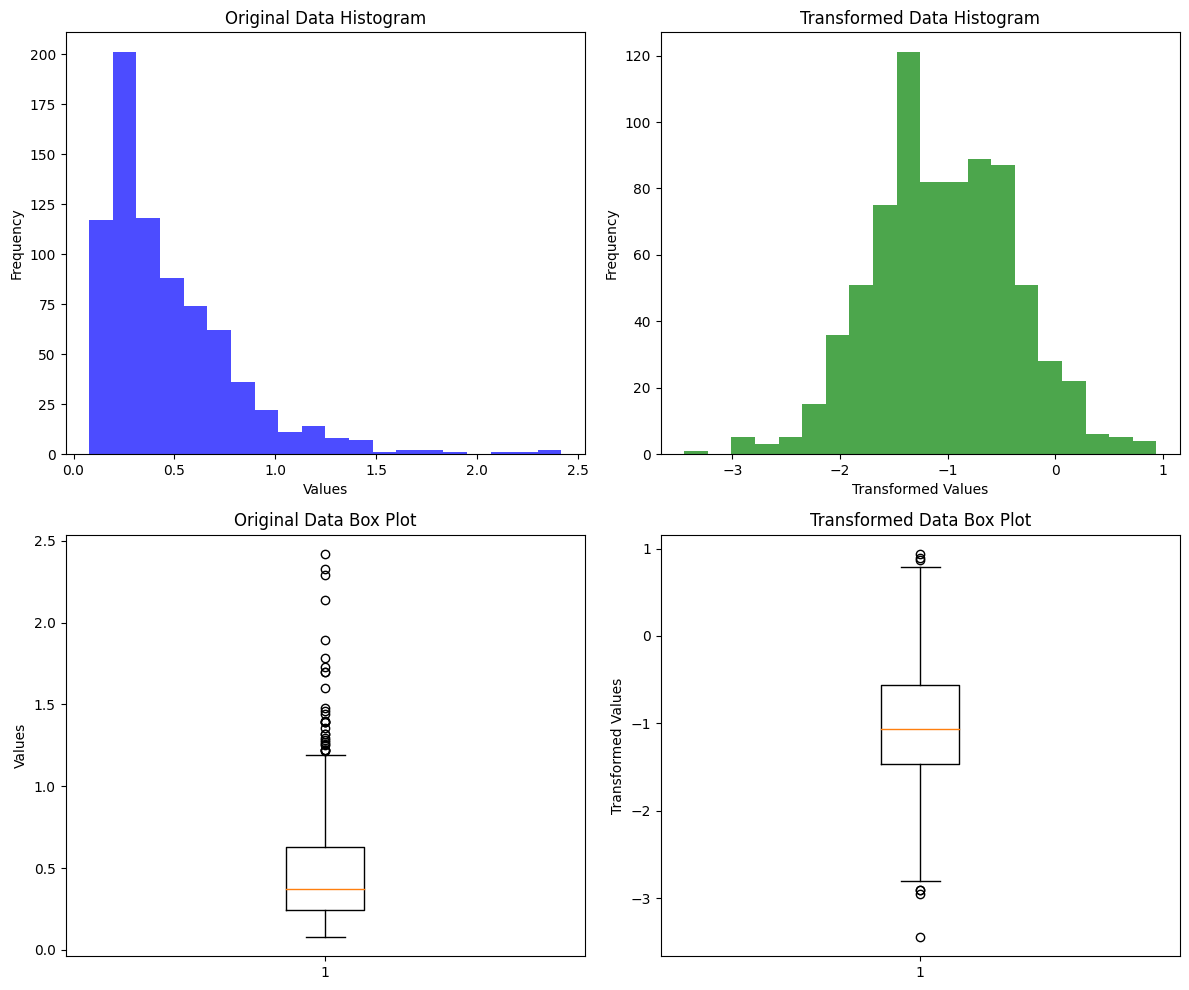

In [ ]:
boxcox_transform_and_plot(data['DiabetesPedigreeFunction'])

In [ ]:
data_positive = data['DiabetesPedigreeFunction'] - np.min(data['DiabetesPedigreeFunction']) + 0.001
transformed_data, _ = boxcox(data_positive)

In [ ]:
transformed_data = pd.DataFrame(transformed_data, columns=['0'])

<Axes: >

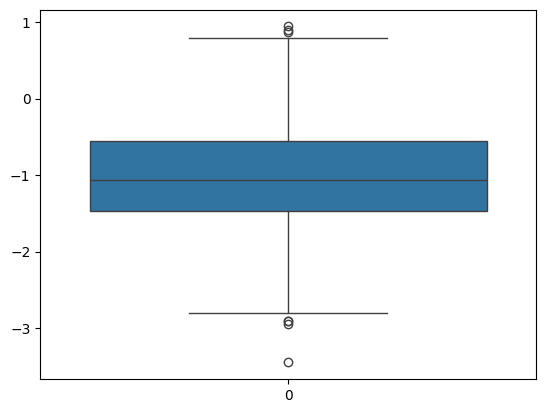

In [ ]:
sns.boxplot(transformed_data)

<Axes: >

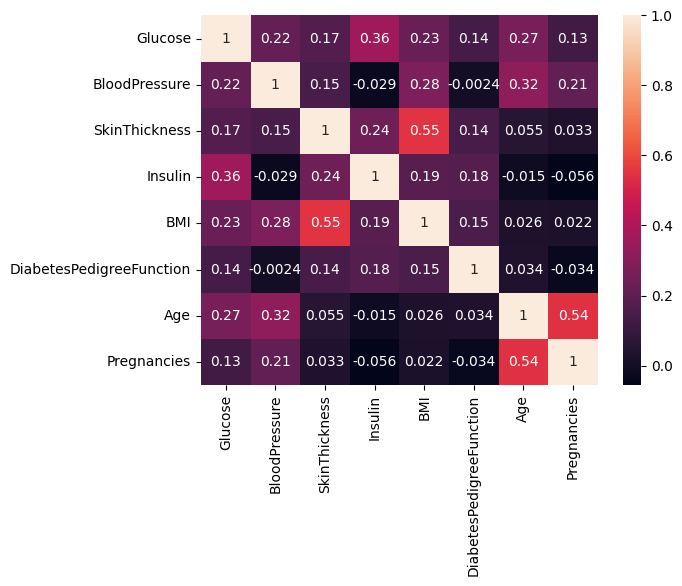

In [ ]:
sns.heatmap(new_data.drop('Outcome',axis =1).corr(),annot=True)

In [ ]:
X = new_data.drop('Outcome', axis = 1)
y = new_data['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
y_train

602    0
429    1
623    0
209    1
589    0
      ..
534    0
584    1
493    1
527    0
168    0
Name: Outcome, Length: 614, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test,y_test)

0.7662337662337663

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
conf_mat = confusion_matrix(y_test,y_preds)
conf_mat

array([[96, 13],
       [23, 22]])

In [ ]:
accuracy_score(y_test,y_preds)

0.7662337662337663

In [ ]:
precision_score(y_test,y_preds)

0.6285714285714286

In [ ]:
recall_score(y_test,y_preds)

0.4888888888888889

In [ ]:
f1_score(y_test,y_preds)

0.5499999999999999

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.63      0.49      0.55        45

    accuracy                           0.77       154
   macro avg       0.72      0.68      0.70       154
weighted avg       0.75      0.77      0.76       154



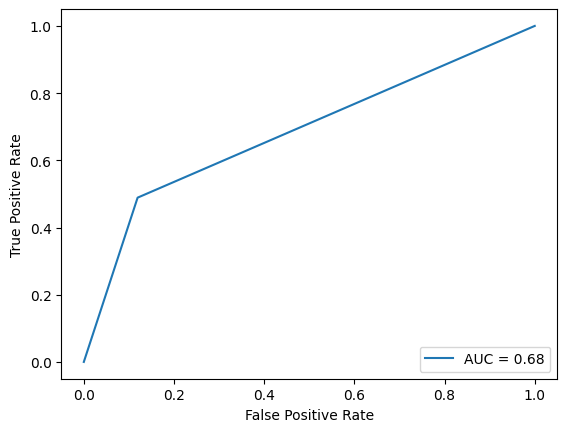

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6848114169215087
